In [ ]:
#! pip install wordcloud


In [1]:
from src.estimation import estimate_text_distribution,count_ai_binary_word_occurrences,count_human_binary_word_occurrences,filter_frequent_words
from src.MLE import MLE
from src.HC import calculate_hc, filter_adjectives,filter_adjectives_spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     ./venv/lib/python3.8/site-packages/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     ./venv/lib/python3.8/site-packages/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to ./venv/lib/python3.8/site-
[nltk_data]     packages/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.04911273057756607


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.027798799526341997


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.026857650540865925


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.029101344348719495


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.028088436426446962


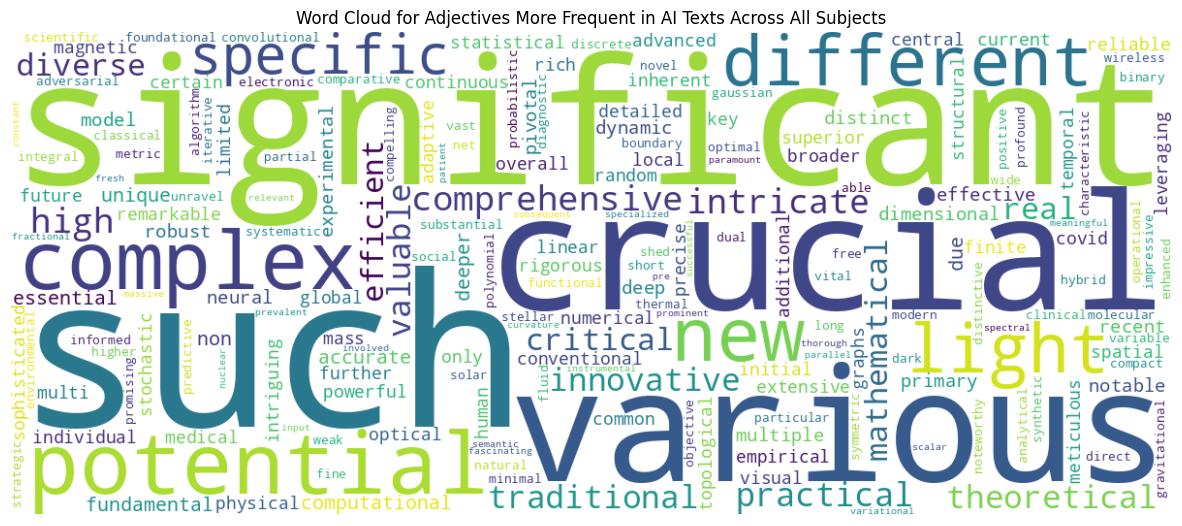

In [5]:
# Initialize a dictionary to store combined word frequencies for adjectives.
combined_word_freq = defaultdict(int)

# Iterate over each subject.
for name in ["CS", "EESS", "Math", "Phys", "Stat"]:
    # Load human and AI data.
    human_data = pd.read_parquet(f"data/training_data/{name}/human_data.parquet")
    ai_data = pd.read_parquet(f"data/training_data/{name}/ai_data.parquet")
    
    # Calculate HC words and filter for adjectives.
    num_words, hc_words, more_frequent_in_ai = calculate_hc(human_data, ai_data)
    adjectives_only = filter_adjectives_spacy(more_frequent_in_ai)
    
    # Calculate frequencies of words in `adjectives_only` within AI data.
    for word in adjectives_only:
        # Sum the occurrences of the word across all sentences.
        word_count = sum(sentence.count(word) if isinstance(sentence, str) else sum(token == word for token in sentence) 
                         for sentence in ai_data['ai_sentence'])
        
        # Add the word count to the combined word frequency.
        combined_word_freq[word] += word_count

# Generate a word cloud based on the combined frequencies.
wordcloud = WordCloud(width=1200, height=500, background_color='white').generate_from_frequencies(combined_word_freq)

# Display the word cloud.
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Adjectives More Frequent in AI Texts Across All Subjects")
plt.show()

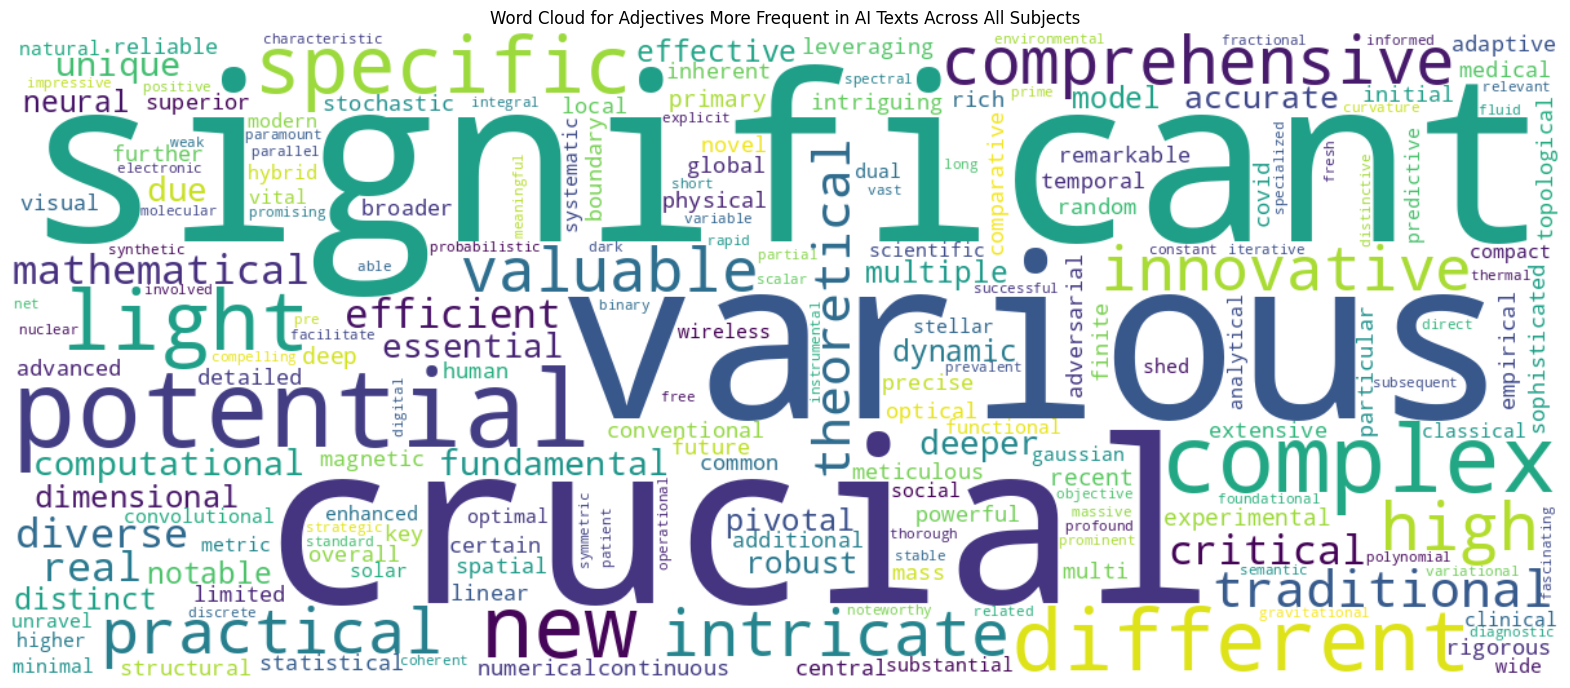

In [19]:
# Generate a word cloud based on the combined frequencies.
combined_word_freq.pop('current', None)
wordcloud = WordCloud(width=1200, height=500, background_color='white').generate_from_frequencies(combined_word_freq)

# Display the word cloud.
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Adjectives More Frequent in AI Texts Across All Subjects")
plt.show()

In [4]:

# for each subject, estimate the distribution of human-written text and AI-generated text
for name in ["CS","EESS","Math","Phys","Stat"]:
    log_likelihood_df = estimate_text_distribution(f"data/training_data/{name}/human_data.parquet",f"data/training_data/{name}/ai_data.parquet",f"distribution/{name}.parquet")
       # Load the datasets from the provided Parquet files.
    human_data=pd.read_parquet(f"data/training_data/{name}/human_data.parquet")
    ai_data=pd.read_parquet(f"data/training_data/{name}/ai_data.parquet")
     # Verify that the expected columns are present in each dataset.
    if 'human_sentence' not in human_data.columns:
        raise ValueError("human_sentence column not found in human data")
    if 'ai_sentence' not in ai_data.columns:
        raise ValueError("ai_sentence column not found in ai data")

    # Filter out records where the sentences are too short (length <= 1) and drop any rows
    # where the sentence is missing (NaN values).
    human_data=human_data[human_data['human_sentence'].apply(len) > 1]
    ai_data=ai_data[ai_data['ai_sentence'].apply(len) > 1]
    human_data.dropna(subset=['human_sentence'], inplace=True)
    ai_data.dropna(subset=['ai_sentence'], inplace=True)
   
   
    human_word_counts = count_human_binary_word_occurrences(human_data)
    ai_word_counts = count_ai_binary_word_occurrences(ai_data)
    
    print(human_word_counts)
    print(ai_word_counts)
    # Calculate the total number of sentences in each dataset.
    total_human_sentences = len(human_data)
    total_ai_sentences = len(ai_data)
    
    print(total_human_sentences)
    print(total_ai_sentences)

    frequent_human_words = filter_frequent_words(human_word_counts, 5)
    frequent_ai_words = filter_frequent_words(ai_word_counts, 3)

    print(frequent_human_words)
    print(frequent_ai_words)



{'2d': 132, 'together': 146, 'region': 133, 'view': 199, 'analysis': 974, 'other': 956, 'requirements': 190, 'curve': 42, 'proposed': 2118, 'perception': 102, 'as': 4402, 'with': 6224, 'used': 1367, 'stability': 57, 'commonly': 116, 'selection': 234, 'uncertainty': 189, 'spreading': 33, 'well': 983, 'the': 25488, 'and': 18334, 'jointly': 146, 'temporal': 320, 'support': 353, 'heat': 17, 'particularly': 144, 'map': 254, 'distribution': 469, 'applied': 341, 'approach': 1736, 'has': 1789, 'local': 385, 'in': 14185, 'rarely': 30, 'optimizing': 81, 'but': 924, 'performance': 2140, 'for': 9089, 'mixed': 112, 'this': 7041, 'is': 9135, 'graphs': 321, 'been': 1206, 'global': 290, 'codes': 206, 'code': 542, 'simultaneously': 152, 'sc': 18, 'beneficial': 52, 'designing': 113, 'it': 2288, 'angle': 37, 'firstly': 67, 'more': 1350, 'changes': 197, 'multi': 914, 'cues': 54, 'to': 17052, 'image': 1027, 'method': 1925, 'of': 20202, 'dnn': 143, 'invariance': 27, 'visual': 498, 'limited': 368, 'feature':

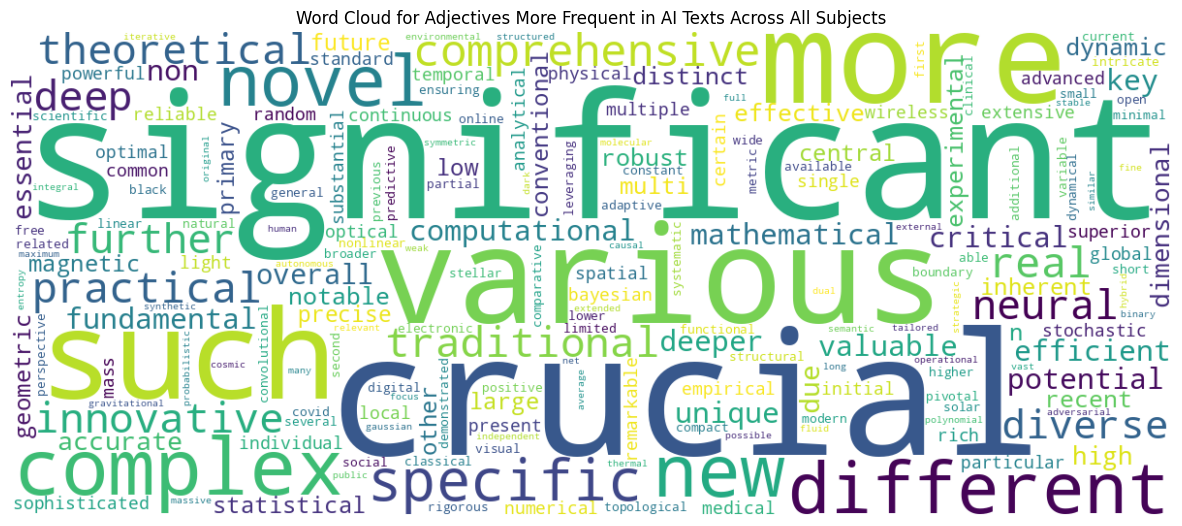

In [5]:
combined_word_freq_p1 = defaultdict(int)


# for each subject, estimate the distribution of human-written text and AI-generated text
for name in ["CS","EESS","Math","Phys","Stat"]:
    log_likelihood_df = estimate_text_distribution(f"data/training_data/{name}/human_data.parquet",f"data/training_data/{name}/ai_data.parquet",f"distribution/{name}.parquet")
    human_word_counts = count_human_binary_word_occurrences(f"data/training_data/{name}/human_data.parquet")
    ai_word_counts = count_ai_binary_word_occurrences(f"data/training_data/{name}/ai_data.parquet")
    
    # Calculate the total number of sentences in each dataset.
    total_human_sentences = len(human_data)
    total_ai_sentences = len(ai_data)
    
    frequent_human_words = filter_frequent_words(human_word_counts, 5)
    frequent_ai_words = filter_frequent_words(ai_word_counts, 3)

    adjectives_only_2 = filter_adjectives_spacy(log_likelihood_df['Word'])
    ai_data = pd.read_parquet(f"data/training_data/{name}/ai_data.parquet")

    # Calculate frequencies of words in `adjectives_only` within AI data.
    for word in adjectives_only_2:
        # Sum the occurrences of the word across all sentences.
        word_count = sum(sentence.count(word) if isinstance(sentence, str) else sum(token == word for token in sentence) 
                         for sentence in ai_data['ai_sentence'])
        
        # Add the word count to the combined word frequency.
        combined_word_freq_p1[word] += word_count

# Generate a word cloud based on the combined frequencies.
wordcloud = WordCloud(width=1200, height=500, background_color='white').generate_from_frequencies(combined_word_freq_p1)

# Display the word cloud.
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Adjectives More Frequent in AI Texts Across All Subjects")
plt.show()


In [ ]:
# for each subject, estimate the alpha value of mixed text and calculate the error
for name in ["CS","EESS","Math","Phys","Stat"]:
    # load the framework
    model=MLE(f"distribution/{name}.parquet")
    for alpha in [0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]:
        estimated,ci=model.inference(f"data/validation_data/{name}/ground_truth_alpha_{alpha}.parquet")
        error=abs(estimated-alpha)
        print(f"{'Ground Truth':>10},{'Prediction':>10},{'CI':>10},{'Error':>10}")
        print(f"{alpha:10.3f},{estimated:10.3f},{ci:10.3f},{error:10.3f}")
    print("=====================================")

In [ ]:
for name in ["CS","EESS","Math","Phys","Stat"]:
   human_data=pd.read_parquet(f"data/training_data/{name}/human_data.parquet")
   ai_data=pd.read_parquet(f"data/training_data/{name}/ai_data.parquet")
   # Verify that the expected columns are present in each dataset.
   if 'human_sentence' not in human_data.columns:
       raise ValueError("human_sentence column not found in human data")
   if 'ai_sentence' not in ai_data.columns:
       raise ValueError("ai_sentence column not found in ai data")
   # Calculate HC-discrepancy value
   num_words, hc_words,more_frequent_in_ai = calculate_hc(human_data, ai_data)
   print(f"The number of discriminating words: {num_words}")
   print(f"List of words: {hc_words}")
   print(f"Words more frequently used by AI compared to human: {more_frequent_in_ai}")

   print("=====================================")
   print("")
   print("")

In [ ]:
adjectives_only = filter_adjectives_spacy(more_frequent_in_ai)
print("Adjectives significantly used by AI:", adjectives_only)

In [ ]:
! pip install wordcloud


In [ ]:
from wordcloud import WordCloud

# Combine word counts into a single dictionary for word cloud input.
human_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(human_freq.to_dict())
ai_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(ai_freq.to_dict())

# Plot the word clouds.
plt.figure(figsize=(16, 8))

# Human-generated text word cloud.
plt.subplot(1, 2, 1)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human Word Cloud')
plt.axis('off')

# AI-generated text word cloud.
plt.subplot(1, 2, 2)
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('AI Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()
